# SkimLit 📙
* The puropose of this notebook is to build a model that to make read medical abstract easier.

* The paper we are replicating will be avialable [here](https://arxiv.org/abs/1710.06071)
Reading the papr will see the model architecture to achieve best [results](https://arxiv.org/pdf/1710.06071.pdf).

# Step one is to get the dataset.[LINK](https://github.com/Franck-Dernoncourt/pubmed-rct)

In [1]:
! git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.sing objects: 100% (9/9)
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 2.57 MiB/s, done.
Resolving deltas: 100% (15/15), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [2]:
!ls /Users/adityasinha/Desktop/Deep_Learning/project_nlp/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt   test.txt  train.txt


In [2]:
#  train;test;dev(validation)
# Start our ecp with using 20k dataset with numbers replaced by '@' sign
data_dir="pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"
import os
filenames=[data_dir+filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signdev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtrain.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtest.txt']

In [3]:
data_dir

'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign'

In [4]:
def get_lines(filename):
    with open(filename) as f:
        return f.readlines()
    

In [85]:
del(train_lines)

In [5]:
# from helper_function import get_lines
train_lines=get_lines(data_dir+"/train.txt")# reads line from train.txt
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [6]:
len(train_lines)

210040

In [7]:
def preprocess_text_with_line_number(filename):
    '''
    Retunrs a list of dictionaries of abstract line data.
    Takes in file name reads the data,extraxting things like target 
    label ,text of sentence.
    '''
    input_lines=get_lines(filename)# get all the lines
    abstract_line=""
    abstract_sample=[]
    # Loop through each line in txt file
    for line in input_lines:
        if line.startswith("###"):
            abstract_id=line
            abstract_line=""
        elif line.isspace():
            abstract_line_split=abstract_line.splitlines()
            
            for abstract_line_number,abstract_line in enumerate(abstract_line_split):
                line_data={}
                target_text_spilt=abstract_line.split("\t")
                line_data["target"]=target_text_spilt[0]
                line_data["text"]=target_text_spilt[1].lower()
                line_data["line_number"]=abstract_line_number
                line_data["total_lines"]=len(abstract_line_split)-1
                abstract_sample.append(line_data)
        else:
            abstract_line+=line
    return abstract_sample
                

In [8]:
%%time
train_sample=preprocess_text_with_line_number(data_dir+"/train.txt")
val_samples=preprocess_text_with_line_number(data_dir+"/dev.txt")
test_sample=preprocess_text_with_line_number(data_dir+"/test.txt")
len(train_sample),len(test_sample),len(val_samples)

CPU times: user 225 ms, sys: 26.1 ms, total: 251 ms
Wall time: 253 ms


(180040, 30135, 30212)

In [9]:
train_sample[:10]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [10]:
import pandas as pd
train_df=pd.DataFrame(train_sample)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_sample)
train_df.head(10)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [11]:
# distribution of labels
train_df.value_counts("target")

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

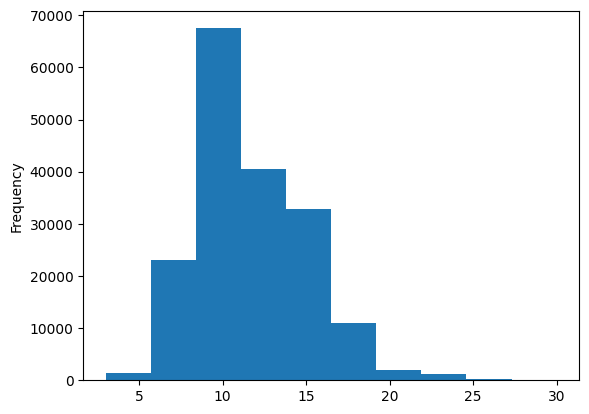

In [12]:
# let's check the length of different lines
import matplotlib.pyplot as plt
train_df.total_lines.plot.hist();

In [13]:
# Get abstract text lines into lists
train_sentence=train_df["text"].to_list()
val_sentence=val_df["text"].to_list()
test_sentence=test_df["text"].to_list()
len(train_sentence),len(val_sentence),len(test_sentence)

(180040, 30212, 30135)

In [14]:
# view the first 10 lines of training sentences
train_sentence[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [15]:
import sklearn
print(sklearn.__version__)

1.3.2


In [16]:
# getting numerical label
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=False)
train_label_one_hot=one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_label_one_hot=one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_label_one_hot=one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))
train_label_one_hot;

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
import tensorflow as tf
tf.constant(train_label_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

In [31]:
# Extract labels
from sklearn.preprocessing import LabelEncoder
Label_encoder=LabelEncoder()
train_label_encoded=Label_encoder.fit_transform(train_df["target"].to_numpy())
test_label_encoded=Label_encoder.fit_transform(test_df["target"].to_numpy())
val_label_encoded=Label_encoder.fit_transform(val_df["target"].to_numpy())
# check how encoded labels look like
# train_label_encoded
test_label_encoded

array([0, 4, 4, ..., 4, 4, 1])

In [32]:
num_classes=len(Label_encoder.classes_)
names_class=Label_encoder.classes_
num_classes,names_class

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

# Starting a series of modelling experiments..
(TF-IDF Multinomial Naive Bayes Classifier)

# model_0 : Getting a baseline

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
# create a pipeline
model_0=Pipeline([ 
    ("tf-idf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])
# Fit pipeline to training data
model_0.fit(train_sentence,train_label_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [34]:
# Evaluate the model
model_0.score(val_sentence,val_label_encoded)

0.7218323844829869

In [35]:
# make prediction using baseline method
baseline_pred=model_0.predict(val_sentence)


In [38]:
from helper_function import calculate_results
baseline_result=calculate_results(y_true=val_label_encoded,y_pred=baseline_pred,)
baseline_result

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

# preparing our data for deep sequence model
creating vectorisation and embeddings

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [44]:
# how long is sentence is avg
sent_lens=[len(sentence.split()) for sentence in train_sentence]
avg_sen_lens=np.mean(sent_lens)
avg_sen_lens

26.338269273494777

(array([1.5999e+05, 1.8760e+04, 1.1510e+03, 9.9000e+01, 2.8000e+01,
        1.0000e+01, 2.0000e+00]),
 array([  1.        ,  43.14285714,  85.28571429, 127.42857143,
        169.57142857, 211.71428571, 253.85714286, 296.        ]),
 <BarContainer object of 7 artists>)

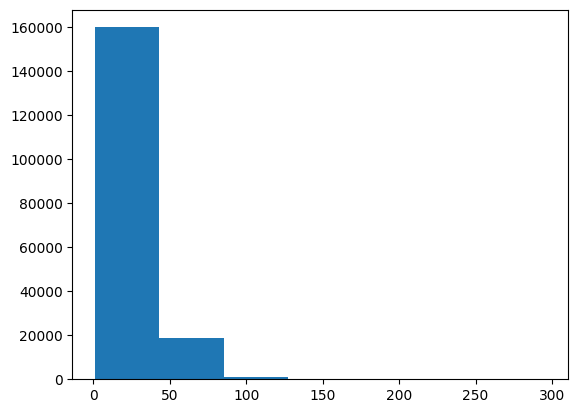

In [46]:
# what's the distribution looks like
plt.hist(sent_lens,bins=7)

In [48]:
#how long of a sentence length cover 95% of examples
out_seq_length=int(np.percentile(sent_lens,95))
out_seq_length

55

In [49]:
max(sent_lens)


296

In [50]:
# words in our vacab
max_token=68000

In [51]:
# create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer=TextVectorization(max_tokens=max_token,output_sequence_length=out_seq_length)

In [52]:
text_vectorizer.adapt(train_sentence)

In [58]:
# test text_vectorizer on random sentence
import random
target_sentence=random.choice(train_sentence)
print(f"Target sentence:\t{target_sentence}")
print(f"Length of target sentence:\t{len(target_sentence)}")
print(f"Vectorised Target sentence:\t{text_vectorizer(target_sentence)}")

Target sentence:	leu-enriched eaa ingestion after re may prolong the anabolic response and sensitivity of skeletal muscle to amino acids in older adults .
Length of target sentence:	137
Vectorised Target sentence:	[53747 11219  2548    21  4013    91  5487     2  9245   142     3   509
     4  2681   368     6  2729  1458     5   350   266     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]


In [56]:
# how many words in our training vocab 
rct_20k_text_vocab=text_vectorizer.get_vocabulary()
print(f'Number of words in vocab:\t{len(rct_20k_text_vocab)}')
print(f'Most common words in vocab:\t{rct_20k_text_vocab[:5]}')
print(f'Least common words in vocab:\t{rct_20k_text_vocab[-5:]}')

Number of words in vocab:	64841
Most common words in vocab:	['', '[UNK]', 'the', 'and', 'of']
Least common words in vocab:	['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [55]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [57]:
# create token embed layer
token_embed=layers.Embedding(input_dim=len(rct_20k_text_vocab),
                             output_dim=128,
                             mask_zero=True,#use to handle variable sequence length
                             name="Token_embedding")

In [61]:
# show example embedding
print(f"Target sentence:\n{target_sentence}\n")
vectorised_text=text_vectorizer([target_sentence])
print(f'Vectorised Text (before embedding):\n{vectorised_text}\n')
embed_text=token_embed(vectorised_text)
print(f'Embedded sentence:\n{embed_text}\n')
print(f'Embedded sentence shape:\n{embed_text.shape}')

Target sentence:
leu-enriched eaa ingestion after re may prolong the anabolic response and sensitivity of skeletal muscle to amino acids in older adults .

Vectorised Text (before embedding):
[[53747 11219  2548    21  4013    91  5487     2  9245   142     3   509
      4  2681   368     6  2729  1458     5   350   266     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Embedded sentence:
[[[ 0.02174083  0.01847147  0.02945835 ...  0.02010132 -0.03698208
    0.01774832]
  [ 0.00347211  0.02728711  0.02636672 ...  0.03208122 -0.00883631
    0.03112677]
  [ 0.04104086  0.01476697  0.01216958 ...  0.00974878  0.00522231
    0.03054065]
  ...
  [-0.02504905 -0.01292958 -0.02114464 ... -0.00046812 -0.03296359
   -0.03560666]
  [-0.02504905 -0.01292958 -0.02114464 ... -0.00046812 -0.03296359
   -0.03560666]
  [-0.02504905 -0.0129295

**creating dataset (making sure our data loads as fast as possible)**
Tensorflow TfdataApi


In [66]:
# turn our data into Tensorflow dataset
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentence,train_label_one_hot))
valid_dataset=tf.data.Dataset.from_tensor_slices((val_sentence,val_label_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentence,test_label_one_hot))
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [67]:
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset=valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

👆🏻do not run the shell more than once


# model_1:conv_1D with token embeddings

In [73]:
# create conv:1D model to process the sequence
inputs=layers.Input(shape=(1,),dtype=tf.string)
text_vectors=text_vectorizer(inputs)
token_embedding=token_embed(text_vectors)
x=layers.Conv1D(64,kernel_size=5,padding='same',activation="relu")(token_embedding)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(num_classes,activation="softmax")(x)
model_1=tf.keras.Model(inputs,outputs)

# compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 Token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                           

In [74]:
history_model_1=model_1.fit(train_dataset,
                            steps_per_epoch=int(0.1*len(train_dataset)),
                            epochs=3,
                            validation_data=valid_dataset,
                            validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 14s 25ms/step - loss: 0.9186 - accuracy: 0.6347 - val_loss: 0.6844 - val_accuracy: 0.7420
Epoch 2/3
562/562 [==============================] - 14s 25ms/step - loss: 0.6587 - accuracy: 0.7556 - val_loss: 0.6311 - val_accuracy: 0.7689
Epoch 3/3
562/562 [==============================] - 14s 24ms/step - loss: 0.6180 - accuracy: 0.7760 - val_loss: 0.5966 - val_accuracy: 0.7859


In [75]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 1s 1ms/step - loss: 0.5999 - accuracy: 0.7864


[0.5999487638473511, 0.7864424586296082]

In [76]:
# make prediction 
model_1_pred_prob=model_1.predict(valid_dataset)
model_1_pred_prob,model_1_pred_prob.shape

945/945 [==============================] - 1s 1ms/step


(array([[4.2644578e-01, 1.5086779e-01, 1.0798279e-01, 2.8799090e-01,
         2.6712788e-02],
        [4.4697219e-01, 2.5432533e-01, 1.1557486e-02, 2.8098053e-01,
         6.1644847e-03],
        [1.2407809e-01, 1.1412474e-02, 1.2676114e-03, 8.6321378e-01,
         2.8129194e-05],
        ...,
        [4.4651074e-06, 9.4174955e-04, 5.4635585e-04, 2.3565235e-06,
         9.9850512e-01],
        [5.9979562e-02, 4.4217119e-01, 1.3811941e-01, 7.9382464e-02,
         2.8034741e-01],
        [1.5253720e-01, 6.9381845e-01, 3.0914152e-02, 4.0050186e-02,
         8.2680024e-02]], dtype=float32),
 (30212, 5))

In [77]:
# convert pred_probs to classes
model_1_preds=tf.argmax(model_1_pred_prob,axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [78]:
names_class

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [79]:
# calculate model_result
model_1_result=calculate_results(y_true=val_label_encoded,
                                 y_pred=model_1_preds)
model_1_result

{'accuracy': 78.64424731894611,
 'precision': 0.783570123762238,
 'recall': 0.7864424731894611,
 'f1': 0.784340876241691}

In [80]:
baseline_result

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

# Feature extraction with pretrained token embedding

* Now let's use pretrained word embedding from [Tensorflow Hub](https://www.tensorflow.org/hub) more specifically the [universal sentence encoder](https://tfhub.dev/google/universal-sentence-encoder/4)

In [87]:
import tensorflow_hub as hub
model_url="https://tfhub.dev/google/universal-sentence-encoder/4"
tf_hub_embedding_layer=hub.KerasLayer(model_url,trainable=False,name="universal_model_encoder")


In [91]:
# test our pretrained embedding on random sentence
random_train_sentence=random.choice(train_sentence)
print(f'Random_sentence:\n{random_train_sentence}')
use_embed_sentence=tf_hub_embedding_layer([random_train_sentence])
print(f'Sentence after embedding:\n{use_embed_sentence[0][:30]}')
print(f'embed_sentence shape:{len(use_embed_sentence)}')


Random_sentence:
during the study period , @ patients were enrolled in the mantra-paf trial and randomized to receive aad ( n = @ ) or rfa ( n = @ ) .
Sentence after embedding:
[ 0.04489737 -0.03066579  0.00450228 -0.04732339 -0.05499103  0.03233
  0.07160506 -0.01528414 -0.05354669 -0.06376673  0.08075926 -0.00634388
  0.08466796  0.0480428   0.04119825 -0.00428582 -0.08443007 -0.03178567
  0.03263806 -0.07911015  0.08352601  0.02648749 -0.04039235 -0.04051289
 -0.02799089  0.00411669  0.0393624   0.01987316  0.03467731 -0.0177483 ]
embed_sentence shape:1


# building and fitting NLP feature extraction model using pretrained embeddings 

In [92]:
# define feature extraction model
inputs=layers.Input(shape=[],dtype=tf.string)
pretrained_embedding=tf_hub_embedding_layer(inputs)
x=layers.Dense(128,activation="relu")(pretrained_embedding)
outputs=layers.Dense(num_classes,activation="softmax")(x)
model_2=tf.keras.Model(inputs,outputs,name="model_2_use_feature_extractor")


In [93]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "model_2_use_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_model_encoder (K  (None, 512)               256797824 
 erasLayer)                                                      
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [94]:
# Fit model_2 data
history_model_2=model_2.fit(train_dataset,
                            steps_per_epoch=int(0.1*len(train_dataset)),
                            epochs=3,
                            validation_data=valid_dataset,
                            validation_steps=int(0.1*len(valid_dataset)))


Epoch 1/3
562/562 [==============================] - 5s 5ms/step - loss: 0.9183 - accuracy: 0.6500 - val_loss: 0.7975 - val_accuracy: 0.6895
Epoch 2/3
562/562 [==============================] - 3s 4ms/step - loss: 0.7705 - accuracy: 0.6998 - val_loss: 0.7583 - val_accuracy: 0.7041
Epoch 3/3
562/562 [==============================] - 2s 4ms/step - loss: 0.7555 - accuracy: 0.7107 - val_loss: 0.7444 - val_accuracy: 0.7108


In [95]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 3s 4ms/step - loss: 0.7454 - accuracy: 0.7126


[0.7453789710998535, 0.7125645279884338]

In [96]:
# make prediction with feature extraction model
model_2_pred_probs=model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 4s 3ms/step


array([[0.44101283, 0.3368343 , 0.00201395, 0.21143112, 0.00870784],
       [0.3231233 , 0.52961284, 0.0027923 , 0.14104159, 0.00342994],
       [0.22385626, 0.15871595, 0.0189735 , 0.55776656, 0.04068768],
       ...,
       [0.00184711, 0.00668474, 0.05789457, 0.00105865, 0.93251497],
       [0.00381543, 0.04405604, 0.17376395, 0.00148126, 0.7768833 ],
       [0.19790417, 0.36688933, 0.37949586, 0.00633908, 0.04937148]],
      dtype=float32)

In [97]:
model_2_preds=tf.argmax(model_2_pred_probs,axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [99]:
# results
model_2_result=calculate_results(y_pred=model_2_preds,y_true=val_label_encoded)
model_2_result

{'accuracy': 71.25645438898451,
 'precision': 0.7132764280823973,
 'recall': 0.7125645438898451,
 'f1': 0.7097089978600224}

# Model_3 : Conv1D with character embeddings


In [100]:
# create a character level tokenizer
#  this is going to map each charcter to some int
train_sentence[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [103]:
def spilt_char(text):
    return " ".join(list(text))
spilt_char(train_sentence[0])
# list(train_sentence[0])

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [104]:
# Text spiliting non charater level sequence into charcaters
spilt_char(random_train_sentence)

'd u r i n g   t h e   s t u d y   p e r i o d   ,   @   p a t i e n t s   w e r e   e n r o l l e d   i n   t h e   m a n t r a - p a f   t r i a l   a n d   r a n d o m i z e d   t o   r e c e i v e   a a d   (   n   =   @   )   o r   r f a   (   n   =   @   )   .'

In [105]:
# Spilt sequence-level data spilts into charcater level data spilts
train_chars=[spilt_char(sentence) for sentence in train_sentence]
valid_chars=[spilt_char(sentence) for sentence in val_sentence]
test_chars=[spilt_char(sentence) for sentence in test_sentence]
print(train_chars[:5])

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .', 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .', 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a n 

In [106]:
# avg character length
char_lens=[len(sentence) for sentence in train_sentence]
mean_char_len=np.mean(char_lens)
mean_char_len

149.3662574983337

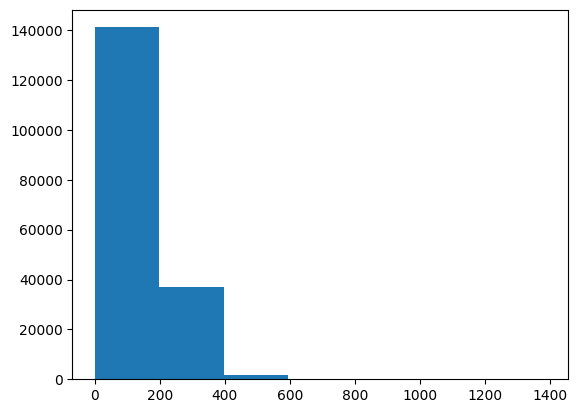

In [107]:
# check the distribution of our sequence at character-level
import matplotlib.pyplot as plt
plt.hist(char_lens,bins=7);

In [108]:
# what character lenght covers 95% of sequences
output_seq_char_len=int(np.percentile(char_lens,95))
output_seq_char_len

290

In [109]:
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [110]:
# create char-level token vectorizer
NUM_CHAR_TOKENS=len(alphabet)+2
char_vectorizer=TextVectorization(max_tokens=NUM_CHAR_TOKENS,output_sequence_length=output_seq_char_len,name="char_vectorizer")

In [111]:
# Adapt charcater-vectorizer to training character
char_vectorizer.adapt(train_chars)



In [112]:
# check character vocab stats
char_vocab=char_vectorizer.get_vocabulary()
print(f'Number of different character in character_vocab:{len(char_vocab)}')
print(f'5 most common character:{char_vocab[:5]}')
print(f'5 most uncommon character:{char_vocab[-5:]}')

Number of different character in character_vocab:28
5 most common character:['', '[UNK]', 'e', 't', 'i']
5 most uncommon character:['k', 'x', 'z', 'q', 'j']


In [118]:
# test out char_vectorizer
random_char=random.choice(train_chars)
print(f'Random_char:\n{random_char}\n')
print(f'Len of random_char:\n{len(random_char.split())}\n')
vectorised_char=char_vectorizer(random_char)
print(f'Vectorised char:\n{vectorised_char}\n')
print(f' vectorised_char Length:\n{len(vectorised_char)}')



Random_char:
b e t w e e n   f e b   @   ,   @   ,   a n d   s e p t   @   ,   @   ,   @   p a t i e n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   c l i n i c   p l u s   c o m m u n i t y   s u p p o r t   a n d   @   t o   s t a n d a r d   c a r e   .

Len of random_char:
101

Vectorised char:
[22  2  3 20  2  2  6 17  2 22  5  6 10  9  2 14  3 14  5  3  4  2  6  3
  9 20  2  8  2  8  5  6 10  7 15 12 19  5  9  9  4 18  6  2 10  3  7 11
 12  4  6  4 11 14 12 16  9 11  7 15 15 16  6  4  3 19  9 16 14 14  7  8
  3  5  6 10  3  7  9  3  5  6 10  5  8 10 11  5  8  2  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 

# Creating a character level embedding


In [119]:
char_embed=layers.Embedding(input_dim=len(char_vocab),
                            output_dim=25,# from the paper itself
                            mask_zero=True,
                            name="char_embed")


In [121]:
# Test our character embedding layer
print(f'Charified text:\n{random_char}')
char_embed_ex=char_embed(char_vectorizer(random_char))
print(f"Embedded char:\n{char_embed_ex}")
print(f'Shape of Embedded character:\n{char_embed_ex.shape}')

Charified text:
b e t w e e n   f e b   @   ,   @   ,   a n d   s e p t   @   ,   @   ,   @   p a t i e n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   c l i n i c   p l u s   c o m m u n i t y   s u p p o r t   a n d   @   t o   s t a n d a r d   c a r e   .
Embedded char:
[[-0.00216473  0.04368866 -0.0414394  ...  0.02553073 -0.02856851
  -0.00242285]
 [ 0.04659021 -0.02455063 -0.03581431 ... -0.00729131 -0.01115816
   0.04115817]
 [-0.0294889  -0.03507514  0.0153514  ...  0.03160021 -0.01474099
   0.04279155]
 ...
 [ 0.02338675 -0.01987895  0.03565068 ... -0.04627844 -0.02142141
   0.03212336]
 [ 0.02338675 -0.01987895  0.03565068 ... -0.04627844 -0.02142141
   0.03212336]
 [ 0.02338675 -0.01987895  0.03565068 ... -0.04627844 -0.02142141
   0.03212336]]
Shape of Embedded character:
(290, 25)


In [122]:
len(random_char)

255

# Building a conv1D model to fit char_embedding

In [129]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
char_vector=char_vectorizer(inputs)
char_embeddings=char_embed(char_vector)
x=layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(char_embeddings)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(num_classes,activation="softmax")(x)
model_3=tf.keras.Model(inputs,outputs,name="con1D_char_embedding")
# compile
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [130]:
model_3.summary()

Model: "con1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_3 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_5 (Dense)             (None, 5)        

In [131]:
# create char level dataset
train_char_dataset=tf.data.Dataset.from_tensor_slices((train_chars,train_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset=tf.data.Dataset.from_tensor_slices((valid_chars,val_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset=tf.data.Dataset.from_tensor_slices((test_chars,test_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [132]:
history_model_3=model_3.fit(train_char_dataset,steps_per_epoch=int(0.1*len(train_char_dataset)),epochs=3,validation_data=val_char_dataset,validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 3s 5ms/step - loss: 1.2875 - accuracy: 0.4835 - val_loss: 1.0471 - val_accuracy: 0.5858
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 1.0032 - accuracy: 0.5986 - val_loss: 0.9308 - val_accuracy: 0.6386
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9209 - accuracy: 0.6382 - val_loss: 0.8653 - val_accuracy: 0.6679


In [139]:
# make prediction with character model
model_3_pred_probs=model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 1s 2ms/step


array([[0.09985829, 0.51783884, 0.13048032, 0.08996594, 0.16185658],
       [0.19184962, 0.27257574, 0.05166551, 0.30038595, 0.18352324],
       [0.16761799, 0.13661355, 0.31318912, 0.30134836, 0.08123095],
       ...,
       [0.00621477, 0.0250619 , 0.08999064, 0.01533204, 0.86340064],
       [0.04537912, 0.10513162, 0.40445754, 0.07898357, 0.36604813],
       [0.44547665, 0.4293028 , 0.04345805, 0.07274197, 0.00902055]],
      dtype=float32)

In [140]:
# convert pred_prob to classes
model_3_preds=tf.argmax(model_3_pred_probs,axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 3, 2, ..., 4, 2, 0])>

In [141]:
# calculate results for model_3
model_3_results=calculate_results(y_true=val_label_encoded,y_pred=model_1_preds)
model_3_results

{'accuracy': 78.64424731894611,
 'precision': 0.783570123762238,
 'recall': 0.7864424731894611,
 'f1': 0.784340876241691}

# Model-4:Combining pretrained token embedding + character embeddings
1. create a token level embedding model(similar `model1`)
2. create character level model (`model_3` with some modifications)
3. combine 1 & 2 with a concatenate
4. Construct a model which takes takes token and character level sequence as input and produces sequence level probabilities as output.


In [144]:
# 1.Setup token inputs/model
token_input=layers.Input(shape=[],dtype=tf.string)
token_embeddings=tf_hub_embedding_layer(token_input)
token_output=layers.Dense(128,activation="relu")(token_embeddings)
token_model=tf.keras.Model(token_input,token_output)
# 2. Setup char input/model
char_input=layers.Input(shape=(1,),dtype=tf.string)
char_vectors=char_vectorizer(char_input)
char_embedding=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embedding)# from paper
char_model=tf.keras.Model(char_input,char_bi_lstm)
# 3. Concatenate token and char inputs(create hybrid token embeddings)
token_char_conca=layers.Concatenate(name="token_char_hybrid")([token_model.output,char_model.output])
# 4. Create output layer - adding in Dropout ,discussed in section 4.2 of paper
combined_dropout=layers.Dropout(0.5)(token_char_conca)
combined_dense=layers.Dense(128,activation="relu")(combined_dropout)
final_dropout=layers.Dropout(0.5)(combined_dense)
output_layer=layers.Dense(num_classes,activation="softmax")(final_dropout)
# 5.Construct model with char and token inputs
model_4=tf.keras.Model(inputs=[token_model.input,char_model.input],
                       outputs=output_layer,
                       name="model_4_token_and_char_embeddings")



In [145]:
# summary of model
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 input_14 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['input_15[0][0]']            
 rization)                                                                                        
                                                                                                  
 universal_model_encoder (K  (None, 512)                  2567978 

In [151]:
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Combine token and character data into tf.data.Dataset

In [152]:
train_char_token_data=tf.data.Dataset.from_tensor_slices((train_sentence,train_chars))#make data
train_char_token_label=tf.data.Dataset.from_tensor_slices(train_label_one_hot)#make label
train_char_token_dataset=tf.data.Dataset.zip(train_char_token_data,train_char_token_label)
# prefecth and batch
train_char_token_dataset=train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [153]:
test_char_token_data=tf.data.Dataset.from_tensor_slices((test_sentence,test_chars))#make data
test_char_token_label=tf.data.Dataset.from_tensor_slices(test_label_one_hot)#make label
test_char_token_dataset=tf.data.Dataset.zip(test_char_token_data,test_char_token_label)
# prefecth and batch
test_char_token_dataset=test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [154]:
val_char_token_data=tf.data.Dataset.from_tensor_slices((val_sentence,valid_chars))#make data
val_char_token_label=tf.data.Dataset.from_tensor_slices(val_label_one_hot)#make label
val_char_token_dataset=tf.data.Dataset.zip(val_char_token_data,val_char_token_label)
# prefecth and batch
val_char_token_dataset=val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [156]:
# checking out our training data
train_char_dataset,val_char_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [157]:
# Fitting the model on token and chars
history_model_4=model_4.fit(train_char_token_dataset,
                            steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                            epochs=3,
                            validation_data=val_char_token_dataset,
                            validation_steps=int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 35s 55ms/step - loss: 0.9787 - accuracy: 0.6082 - val_loss: 0.7786 - val_accuracy: 0.6998
Epoch 2/3
562/562 [==============================] - 29s 52ms/step - loss: 0.8024 - accuracy: 0.6953 - val_loss: 0.7162 - val_accuracy: 0.7217
Epoch 3/3
562/562 [==============================] - 29s 51ms/step - loss: 0.7728 - accuracy: 0.7022 - val_loss: 0.6991 - val_accuracy: 0.7320


In [ ]:
# evaluation 
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 10s 11ms/step - loss: 0.7031 - accuracy: 0.7317


[0.7031465768814087, 0.7316960096359253]

In [159]:
model_4_pred_probs=model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 12s 11ms/step


array([[4.2065266e-01, 4.0569589e-01, 4.6365657e-03, 1.6071984e-01,
        8.2950545e-03],
       [3.5755911e-01, 4.6678671e-01, 1.9750118e-03, 1.7228042e-01,
        1.3987757e-03],
       [2.7144706e-01, 9.3972988e-02, 4.1702576e-02, 5.6603485e-01,
        2.6842561e-02],
       ...,
       [3.9243419e-04, 5.8359597e-03, 5.8359545e-02, 1.7903387e-04,
        9.3523300e-01],
       [5.2012573e-03, 4.4131838e-02, 2.5643536e-01, 2.2958536e-03,
        6.9193566e-01],
       [3.3573315e-01, 3.1483731e-01, 2.6924795e-01, 3.9570812e-02,
        4.0610801e-02]], dtype=float32)

In [160]:
# format pred_probs into pred labels
model_4_preds=tf.argmax(model_4_pred_probs,axis=1)
model_4_results=calculate_results(y_true=val_label_encoded,y_pred=model_4_preds)

In [161]:
model_4_results

{'accuracy': 73.16960148285449,
 'precision': 0.7330313558040406,
 'recall': 0.731696014828545,
 'f1': 0.7290367210748512}

# model_5: Transfer learning from with pretrained token embedding +character embedding + positional embedding


In [162]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


# create positional embeddings

In [163]:
# How different line numbers are there?
train_df["line_number"].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

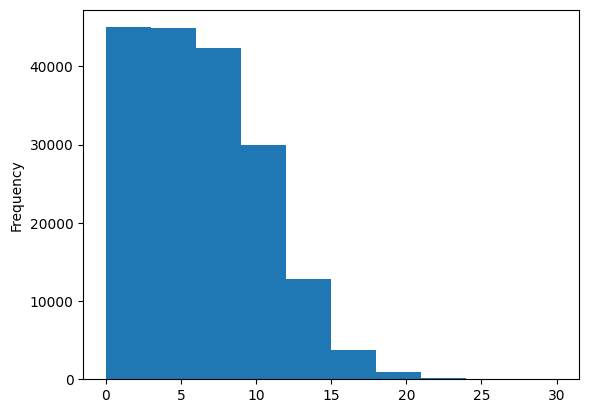

In [165]:
# check distribution of 'line_number'
train_df.line_number.plot.hist();

In [167]:
# use tensorflow to create one-hot-encode
train_line_number_one_hot=tf.one_hot(train_df["line_number"].to_numpy(),depth=15)
test_line_number_one_hot=tf.one_hot(test_df["line_number"].to_numpy(),depth=15)

val_line_number_one_hot=tf.one_hot(val_df["line_number"].to_numpy(),depth=15)

train_line_number_one_hot[:5],train_line_number_one_hot.shape

(<tf.Tensor: shape=(5, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([180040, 15]))

**Now we have encoded our line number let's do the same for our total lines feature..**

In [168]:
# how many different numbers of lines are there?
train_df["total_lines"].value_counts()

total_lines
11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

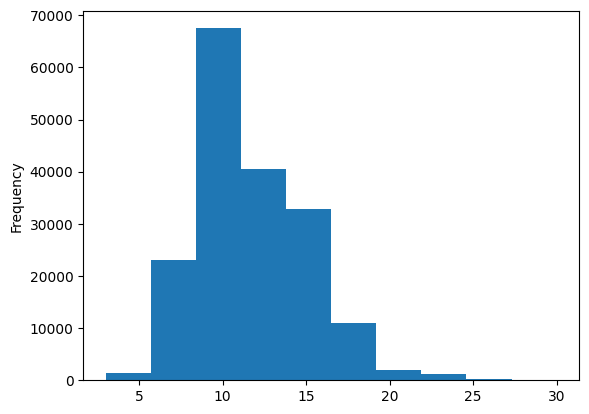

In [169]:
train_df.total_lines.plot.hist()

In [170]:
np.percentile(train_df.total_lines,95)

18.0

In [172]:
# use tf to one-hot-encode the total_lines feature
train_total_lines_one_hot=tf.one_hot(train_df["total_lines"],depth=20)
test_total_lines_one_hot=tf.one_hot(test_df["total_lines"],depth=20)
val_total_lines_one_hot=tf.one_hot(val_df["total_lines"],depth=20)

train_total_lines_one_hot.shape,train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

# Building a tribrid embedding model
1. Create a token-level-model
2. Create a character-level model
3. Create a model for the "line_number" feature
4. Create model for "total_line" feature
5. Combine the outputs of 1 & 2 using tf.keras.layers.concatenate
6. Combine the outputs of 3,4,5 using tf.keras.layers.concatenate
7. Create the output layer to accept the tribed embedding an output level probability
8. Combine the inputs of 1,2,3,4 and outputs of into a tf.keras.Model

In [173]:
# Token model
token_input=layers.Input(shape=[],dtype=tf.string,name="Token_input")
token_embeddings=tf_hub_embedding_layer(token_input)
token_output=layers.Dense(128,activation="relu")(token_embeddings)
token_model=tf.keras.Model(inputs=token_input,outputs=token_output)

# Char inputs
char_inputs=layers.Input(shape=(1,),dtype=tf.string,name="char_input")
char_vector=char_vectorizer(char_inputs)
char_embedding=char_embed(char_vector)
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embedding)
char_model=tf.keras.Model(inputs=char_inputs,outputs=char_bi_lstm)

# Line number model
line_number_input=layers.Input(shape=(15,),dtype=tf.float32,name="line_number_input")
x=layers.Dense(32,activation="relu")(line_number_input)
line_number_model=tf.keras.Model(inputs=line_number_input,outputs=x)

# Total line model
total_lines_inputs=layers.Input(shape=(20,),dtype=tf.float32,name="total_lines_inputs")
y=layers.Dense(32,activation="relu")(total_lines_inputs)
total_line_model=tf.keras.Model(total_lines_inputs,y)

# combine token & char
combined_embeddings=layers.Concatenate(name="char_token_hybrid_embeddings")([token_model.output,char_model.output])

z=layers.Dense(256,activation="relu")(combined_embeddings)
z=layers.Dropout(0.5)(z)

# combine positional embedding with combined char and token embeding
tribrid_embeddings=layers.Concatenate(name="char_token_positional_embeddings")([line_number_model.output,total_line_model.output,combined_embeddings])

# output layer
output_layer=layers.Dense(5,activation="softmax",name="output_layer")(tribrid_embeddings)
model_5=tf.keras.Model(inputs=[line_number_model.input,total_line_model.input,token_model.input,char_model.input],
                       outputs=output_layer)

In [174]:
model_5.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 Token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_model_encoder (K  (None, 512)                  2567978   ['Token_input[0][0]']   

In [175]:
plot_model(model_5)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


*See label smoothing*

In [210]:
# compile model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),#helps to prevent overfitting
                optimizer="adam",metrics=["accuracy"])#run_eagerly=True)



# Create tribid embedding dataset using tf.data

In [211]:
# create training and valid dataset with all 4 inputs
train_char_token_pos_data=tf.data.Dataset.from_tensor_slices((train_line_number_one_hot,
                                                              train_total_lines_one_hot,
                                                              train_sentence,
                                                              train_chars))
train_char_token_pos_label=tf.data.Dataset.from_tensor_slices(train_label_one_hot)
train_char_token_pos_dataset=tf.data.Dataset.zip((train_char_token_pos_data,train_char_token_pos_label))
train_char_token_pos_dataset=train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [212]:
val_char_token_pos_data=tf.data.Dataset.from_tensor_slices((val_line_number_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentence,
                                                              valid_chars))
val_char_token_pos_label=tf.data.Dataset.from_tensor_slices(val_label_one_hot)
val_char_token_pos_dataset=tf.data.Dataset.zip((val_char_token_pos_data,val_char_token_pos_label))
val_char_token_pos_dataset=val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [213]:
test_char_token_pos_data=tf.data.Dataset.from_tensor_slices((test_line_number_one_hot,
                                                              test_total_lines_one_hot,
                                                              test_sentence,
                                                              test_chars))
test_char_token_pos_label=tf.data.Dataset.from_tensor_slices(test_label_one_hot)
test_char_token_pos_dataset=tf.data.Dataset.zip((test_char_token_pos_data,test_char_token_pos_label))
test_char_token_pos_dataset=test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [214]:
train_char_token_dataset,val_char_token_data

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>)

In [215]:
history_model_5=model_5.fit(train_char_token_pos_dataset,
                            steps_per_epoch=int(0.1*len(train_char_token_pos_dataset)),
                            epochs=3,
                            validation_data=val_char_token_pos_dataset,
                            validation_steps=int(0.1*len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 35s 54ms/step - loss: 1.0719 - accuracy: 0.7472 - val_loss: 0.9861 - val_accuracy: 0.7999
Epoch 2/3
562/562 [==============================] - 29s 51ms/step - loss: 0.9686 - accuracy: 0.8138 - val_loss: 0.9584 - val_accuracy: 0.8251
Epoch 3/3
562/562 [==============================] - 29s 51ms/step - loss: 0.9538 - accuracy: 0.8220 - val_loss: 0.9499 - val_accuracy: 0.8258


In [217]:
model_5_pred_probs=model_5.predict(val_char_token_pos_dataset)

945/945 [==============================] - 12s 11ms/step


In [218]:
model_5_preds=tf.argmax(model_5_pred_probs,axis=1)


In [220]:
val_label_encoded

array([0, 0, 3, ..., 4, 1, 1])

In [222]:
# calculate result
model_5_result=calculate_results(y_true=val_label_encoded,y_pred=model_5_preds)
model_5_result

{'accuracy': 82.58969945716935,
 'precision': 0.8242112930705289,
 'recall': 0.8258969945716934,
 'f1': 0.8248535267689584}

In [223]:
model_4_results

{'accuracy': 73.16960148285449,
 'precision': 0.7330313558040406,
 'recall': 0.731696014828545,
 'f1': 0.7290367210748512}

In [224]:
all_model_results=pd.DataFrame({
    "model_0":baseline_result,
    "model_1":model_1_result,
    "model_2":model_2_result,
    "model_3":model_3_results,
    "model_4":model_4_results,
    "model_5":model_5_result
    })
all_model_results=all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_0,72.183238,0.718647,0.721832,0.698925
model_1,78.644247,0.783570,0.786442,0.784341
model_2,71.256454,0.713276,0.712565,0.709709
model_3,78.644247,0.783570,0.786442,0.784341
model_4,73.169601,0.733031,0.731696,0.729037
model_5,82.589699,0.824211,0.825897,0.824854


In [225]:
# reduce accuracy to same scale
all_model_results["accuracy"]=all_model_results["accuracy"]/100

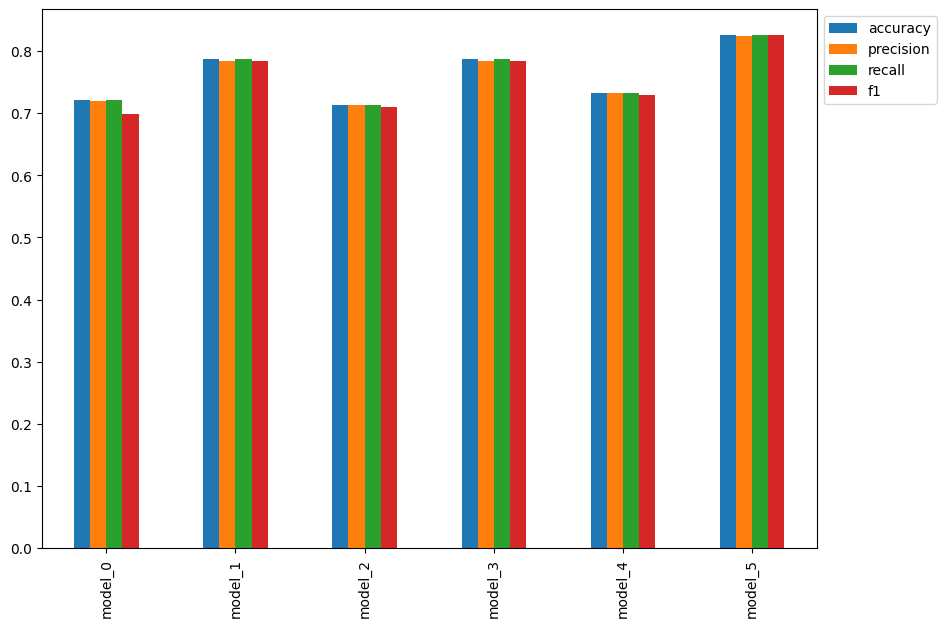

In [226]:
# plot and compare all model results
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

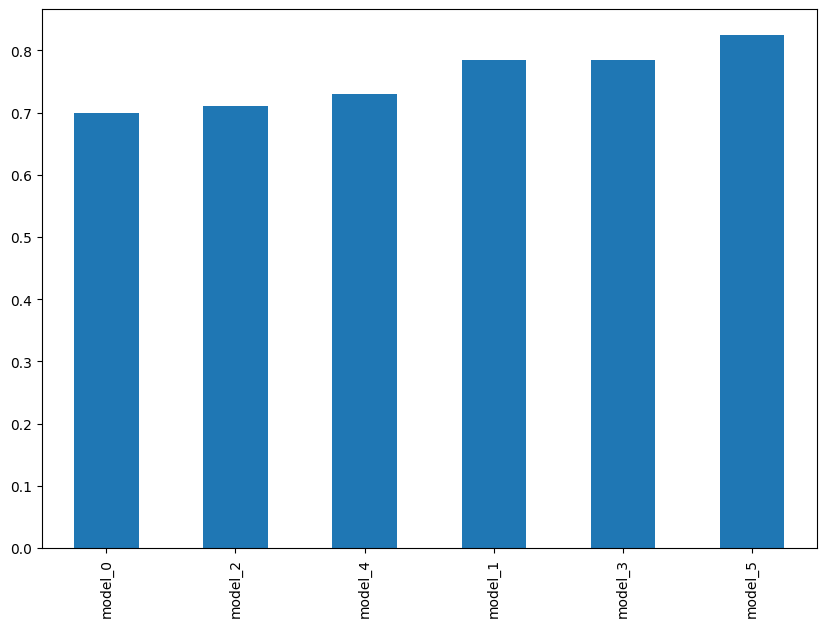

In [227]:
# compare model result by f1-score
all_model_results.sort_values("f1",ascending=True)["f1"].plot(kind="bar",figsize=(10,7));

In [228]:
# save and load model
model_5.save("skimlit_tribrid_model")

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend.py", line 5116, in <genexpr>
    output_ta_t = tuple(  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/python/util/tf_should_use.py", line 288, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend.py", line 5116, in <genexpr>
    output_ta_t = tuple(  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/python/util/tf_should_use.py", line 288, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


INFO:tensorflow:Assets written to: skimlit_tribrid_model/assets


INFO:tensorflow:Assets written to: skimlit_tribrid_model/assets


In [ ]:
# how to load model 
# loaded_model=tf.keras.models.load_model("skimlit_tribrid_model")